In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# 매출

In [71]:
sales_data = pd.read_csv('Onlinesales_info.csv', encoding='cp949')
tax_data = pd.read_csv('Tax_info.csv', encoding='cp949')
Marketing_data = pd.read_csv('Marketing_info.csv', encoding='cp949')

In [72]:
# 각 거래의 총 매출 계산
sales_data['Total Revenue'] = sales_data['Quantity'] * sales_data['Average_Amount']
sales_data['Total Revenue']

0        153.71
1        153.71
2          2.05
3         87.65
4         16.50
          ...  
52919    121.30
52920     48.92
52921    151.88
52922    402.60
52923    322.08
Name: Total Revenue, Length: 52924, dtype: float64

In [73]:
# 월별 총 매출 계산
sales_data['Transaction_Date'] = pd.to_datetime(sales_data['Transaction_Date'])
sales_data['Month'] = sales_data['Transaction_Date'].dt.month
monthly_revenue = sales_data.groupby('Month')['Total Revenue'].sum()

In [74]:
monthly_revenue

Month
1     403624.58
2     310819.80
3     349608.09
4     401618.42
5     307763.42
6     321081.38
7     372638.07
8     401210.37
9     360548.40
10    409681.28
11    508942.62
12    523258.19
Name: Total Revenue, dtype: float64

# 마케팅 비용

In [75]:
# Date 열을 datetime 형식으로 변환
Marketing_data['Date'] = pd.to_datetime(Marketing_data['Date'])

In [76]:
# Date 열을 기준으로 월을 추출
Marketing_data['Month'] = Marketing_data['Date'].dt.month
Marketing_data['Month'] 

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: Month, Length: 365, dtype: int32

In [93]:
# 월을 기준으로 그룹화하여 오프라인 비용과 온라인 비용의 합계를 계산
monthly_costs = Marketing_data.groupby('Month')[['Offline_Cost', 'Online_Cost']].sum()
print(monthly_costs)

       Offline_Cost  Online_Cost
Month                           
1             96600     58328.95
2             81300     55807.92
3             73500     48750.09
4             96000     61026.83
5             65500     52759.64
6             80500     53818.14
7             67500     52717.85
8             85500     57404.15
9             83000     52514.54
10            93500     57724.65
11            93000     68144.96
12           122000     76648.75


# 배송비

In [82]:
# Transaction_Date 열을 datetime 형식으로 변환
sales_data['Transaction_Date'] = pd.to_datetime(sales_data['Transaction_Date'])

In [83]:
# Transaction_Date 열을 기준으로 월을 추출
sales_data['Month'] = sales_data['Transaction_Date'].dt.month

In [92]:
# 월을 기준으로 그룹화하여 배송료의 합계를 계산
monthly_shipping_fee = sales_data.groupby('Month')['Shipping_Fee'].sum()
print(monthly_shipping_fee)

Month
1     59242.32
2     49216.60
3     60799.94
4     41481.74
5     41396.17
6     37513.58
7     48723.93
8     61099.57
9     41005.42
10    45961.88
11    32311.93
12    37881.99
Name: Shipping_Fee, dtype: float64


# 세금

In [87]:
# Product_Category를 기준으로 세율을 병합
merged_data = pd.merge(sales_data, tax_data, on='Product_Category', how='left')

In [88]:
# 각 거래의 세금 계산
merged_data['Tax'] = merged_data['Average_Amount'] * merged_data['GST']

In [91]:
# 월별로 그룹화하여 세금의 합계 계산
monthly_tax = merged_data.groupby(['Month'])['Tax'].sum()
print(monthly_tax)

Month
1     27912.1817
2     20102.9326
3     23497.0407
4     21168.1951
5     21782.8692
6     21669.6835
7     23437.2754
8     24608.5884
9     20971.4272
10    24083.1889
11    28623.3242
12    32856.3545
Name: Tax, dtype: float64


# 손익

In [127]:
# 월별 매출 데이터와 다른 변수 병합
merged_data = pd.merge(monthly_revenue, monthly_tax, on='Month', how='left')

In [128]:
merged_data = pd.merge(merged_data, monthly_shipping_fee, on='Month', how='left')

In [130]:
merged_data = pd.merge(merged_data, monthly_costs, on='Month', how='left')

In [131]:
merged_data

,Total Revenue,Tax,Shipping_Fee,Offline_Cost,Online_Cost
Month,,,,,
1,403624.58,27912.1817,59242.32,96600,58328.95
2,310819.80,20102.9326,49216.60,81300,55807.92
3,349608.09,23497.0407,60799.94,73500,48750.09
4,401618.42,21168.1951,41481.74,96000,61026.83
5,307763.42,21782.8692,41396.17,65500,52759.64
6,321081.38,21669.6835,37513.58,80500,53818.14
7,372638.07,23437.2754,48723.93,67500,52717.85
8,401210.37,24608.5884,61099.57,85500,57404.15
9,360548.40,20971.4272,41005.42,83000,52514.54


In [136]:
# Income 계산하여 열 추가
merged_data['Income'] = merged_data['Total Revenue'] - merged_data['Tax'] - merged_data['Shipping_Fee'] - merged_data['Offline_Cost'] - merged_data['Online_Cost']

In [135]:
merged_data

,Total Revenue,Tax,Shipping_Fee,Offline_Cost,Online_Cost,Income
Month,,,,,,
1,403624.58,27912.1817,59242.32,96600,58328.95,161541.1283
2,310819.80,20102.9326,49216.60,81300,55807.92,104392.3474
3,349608.09,23497.0407,60799.94,73500,48750.09,143061.0193
4,401618.42,21168.1951,41481.74,96000,61026.83,181941.6549
5,307763.42,21782.8692,41396.17,65500,52759.64,126324.7408
6,321081.38,21669.6835,37513.58,80500,53818.14,127579.9765
7,372638.07,23437.2754,48723.93,67500,52717.85,180259.0146
8,401210.37,24608.5884,61099.57,85500,57404.15,172598.0616
9,360548.40,20971.4272,41005.42,83000,52514.54,163057.0128


In [145]:
data = {
    'Month': list(range(1, 13)),
    'Income': [161541.1283, 104392.3474, 143061.0193, 181941.6549, 126324.7408, 127579.9765,
               180259.0146, 172598.0616, 163057.0128, 188411.5611, 286862.4058, 253871.0955]
}

Income = pd.DataFrame(data)

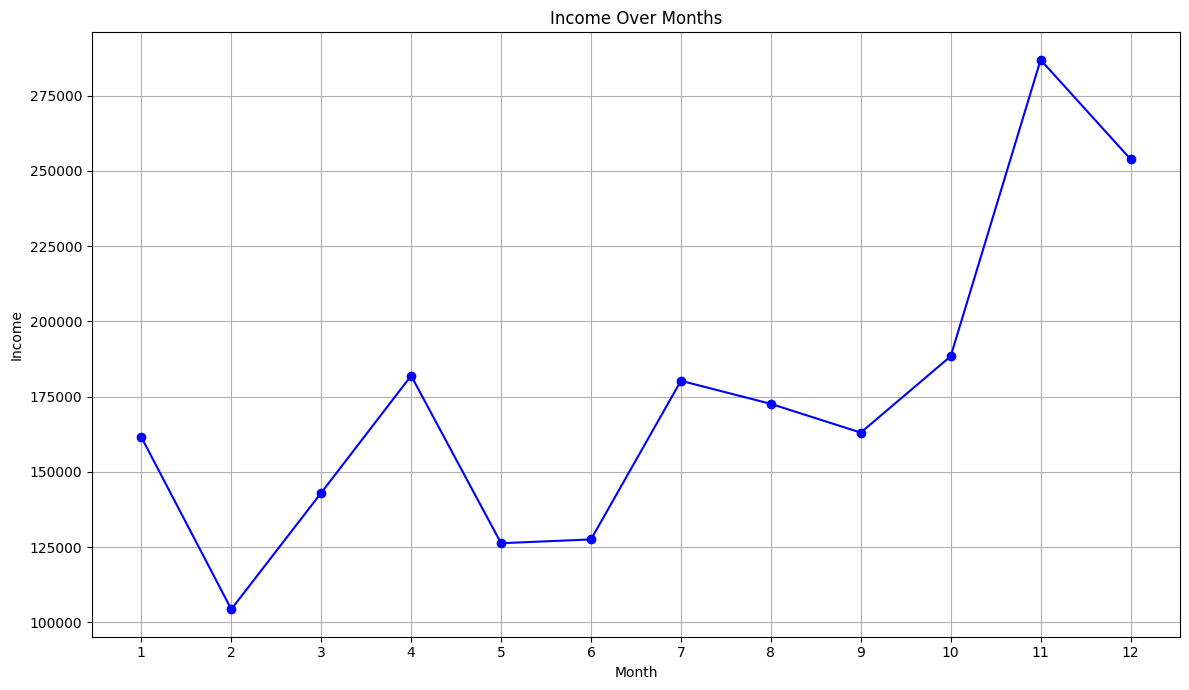

In [154]:
plt.figure(figsize=(12, 7))
plt.plot(Income['Month'], Income['Income'], marker='o', color='b', linestyle='-')
plt.title('Income Over Months')
plt.xlabel('Month')
plt.ylabel('Income')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()